# <center><h1 style="color:Blue;">PROJET MACHINE LEARNING</h1></center>

code groupe 11:GRP6800RV

## <center>Project : Credit Card Fraud Detection With Machine Learning.</center>

<center><h1>TOPIC</h1></center>
Assume that you are employed to help a credit card company to detect potential fraud cases
so that the customers are ensured that they won’t be charged for the items they did not
purchase. You are given a dataset containing the transactions between people, the
information that they are fraud or not, and you are asked to differentiate between them.
The dataset (named : creditcard.csv) contain 31 variables and the last one is in the range of 0
and 1 ; we have 284 807 observations.
You are asked to build a classification models using : SVM, Random forest and the Neural
network, to classify and distinguish fraud transactions.
Work in group of three (03).

### importation des differentes bibliotheques 

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.svm import SVC
import seaborn as sns
from tensorflow import keras
from keras import models
from keras import layers 
import keras
import warnings
warnings.filterwarnings(action='ignore')


### importtons notre dataset

In [2]:
data=pd.read_csv('creditcard.csv')

#### affichons les differentes variable de notre dataset 

In [3]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [4]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


#### Affichons la dimension de notre dataset

In [5]:
data.shape

(284807, 31)

#### Verifions si nous avons des valeurs manquantes dans notre dataset

In [6]:
data.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

#### nous remarquons que nous n'avons pas de donnees manquantes dans notre dataset

#### Affichons le tableau statistique de nos variables

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.165980e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.373150e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.086869e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.490107e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.177556e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406455e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


D'apres le tableau statistique nous remarquons que toutes les variables qui definissent les 
transactions sont a la meme echelle sauf la variable Time et la variable Amount.Nous allons Normaliser les deux colonnes pour les mettre a la meme echelle que les autres.


Normalisations des colonnes Time et Amount

In [8]:
from sklearn.preprocessing import StandardScaler
centre_variable=['Time','Amount']
scaler=StandardScaler()
data[centre_variable]= scaler.fit_transform(data[centre_variable])

In [9]:
X=data.iloc[:,:data.shape[1]-1]

In [10]:
#scaler=StandardScaler()
#X= scaler.fit_transform(X)
#x_test= scaler.transform(x_test)

In [11]:
#Affichons notre tableau statistique apres normalisation
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996583,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,-1.996583,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.996562,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-1.996562,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.996541,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,1.641931,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.350151,0
284803,1.641952,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,-0.254117,0
284804,1.641974,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,-0.081839,0
284805,1.641974,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.313249,0


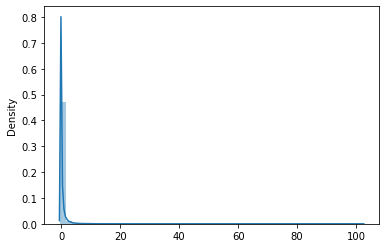

In [12]:
# distribution de la variable Amount
amount = [data['Amount'].values]
sns.distplot(amount)

Comme nous pouvons le constaté en ce basant sur le tableau statistique, en ce qui conserne la moyenne et le maximum des transactions, la distribution de la valeur monétaire de toutes les transactions est fortement biaisée à droite. La grande majorité des transactions sont relativement petites et seule une infime partie des transactions se rapproche même du maximum.

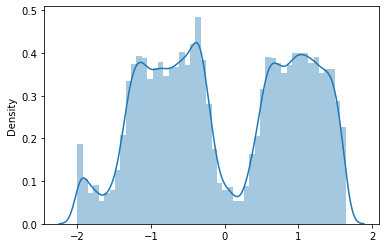

In [13]:
# distribution de la variable Time
time = data['Time'].values
sns.distplot(time)

On remarque que l'heure est enregistrée en nombre de secondes depuis la première transaction dans l'ensemble de données. Par conséquent, nous pouvons conclure que cet ensemble de données comprend toutes les transactions enregistrées au cours de quelques jours. Donc le temps n'a pas d'impact sur la cible en question.

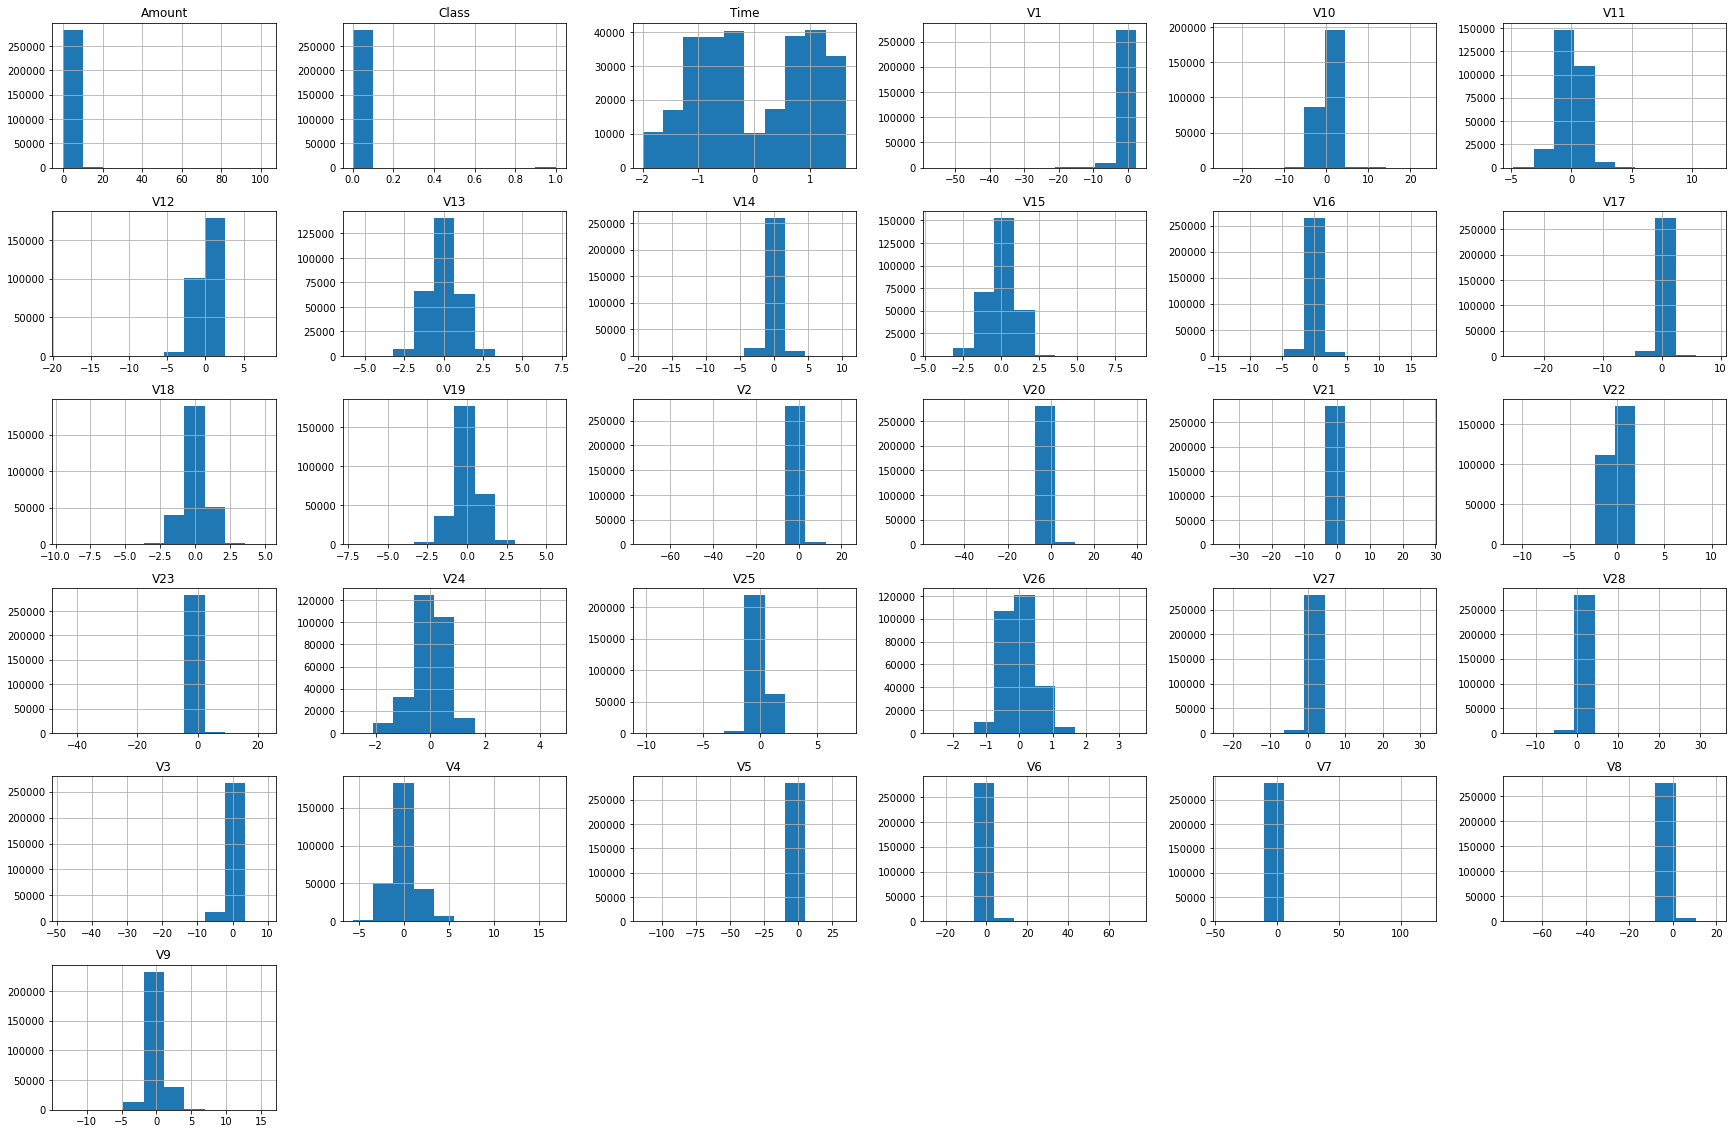

In [14]:
data.hist(figsize=(30,20))
plt.show()

Les graphiques ci-dessus laisse sortir une particularité dans nos données , que nous allons étudier dans la suite.

<function matplotlib.pyplot.show(*args, **kw)>

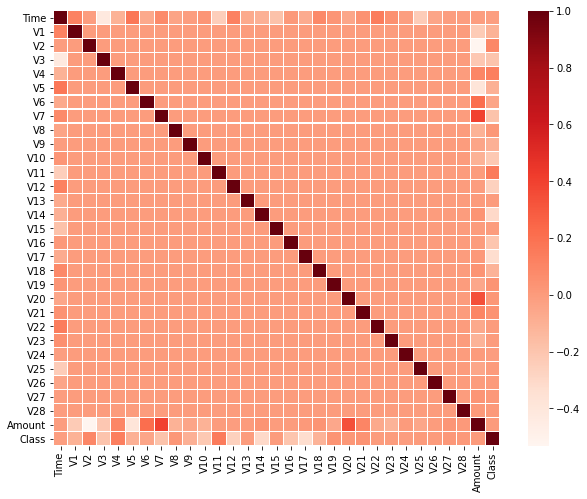

In [15]:
correlationmatrix= data.corr()
fig=plt.figure(figsize=(10,8))
sns.heatmap(correlationmatrix,xticklabels=correlationmatrix.columns,
            yticklabels=correlationmatrix.columns,linewidths=.1,cmap="Reds")
plt.show

La matrice de corrélation nous donne graphiquement une idée de la corrélation entre les caractéristiques et peut nous aider à prédire quelles sont les cvariables les plus pertinentes pour la prédiction.

Remarquons que la plupart des nos variables ne sont pas corrélées mais certaines ont une corrélation positive ou négative les unes avec les autres. Par exemple, V2 et V5 sont fortement corrélés négativement avec la fonctionnalité appelée Amount . Nous voyons également une certaine corrélation avec V20 et Amount . Cela nous permet de mieux comprendre les données dont nous disposons.

verifions le nombre de fraud et de nons fraud

In [16]:
fraud = data[data['Class'] == 1]
non_fraud= data[data['Class'] == 0]

In [17]:
fraud

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,-1.988034,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,-0.353229,1
623,-1.986644,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,1.761758,1
4920,-1.902623,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,0.606031,1
6108,-1.849472,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,-0.117342,1
6329,-1.838248,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,-0.349231,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,1.565196,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,1.206024,1
280143,1.569513,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,-0.350191,1
280149,1.569597,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,-0.041818,1
281144,1.582548,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,0.626302,1


In [18]:
fraud.shape

(492, 31)

In [19]:
non_fraud.shape

(284315, 31)

Seulement 492 (ou 0,172%) des transactions sont frauduleuses. 
Cela signifie que les données sont fortement déséquilibrées par rapport à la variable cible Classe.

separation de la variable Target et les features

In [20]:
#le Target
y=data['Class']
y

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

In [21]:
#les features 
X=data.iloc[:,:data.shape[1]-1]
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.996583,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964
1,-1.996583,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475
2,-1.996562,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686
3,-1.996562,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534
4,-1.996541,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,1.641931,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.350151
284803,1.641952,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,-0.254117
284804,1.641974,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,-0.081839
284805,1.641974,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.313249


division de mes donnees en Train et Text 

In [22]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=60)

In [23]:
x_train.shape,y_train.shape

((227845, 30), (227845,))

# Random forest

In [24]:
model=RandomForestClassifier()
model.fit(x_train,y_train)
ypred= model.predict(x_test)

In [25]:
accuracy_score(y_test,ypred)

0.9995435553526912

In [27]:
precision_score(y_test,ypred)

0.918918918918919

In [28]:
recall_score(y_test,ypred)

0.7727272727272727

In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56874
           1       0.92      0.77      0.84        88

    accuracy                           1.00     56962
   macro avg       0.96      0.89      0.92     56962
weighted avg       1.00      1.00      1.00     56962



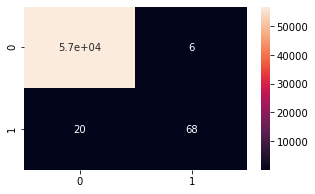

In [30]:
matcon=confusion_matrix(y_test,ypred)
plt.figure(figsize=(5,3))
sns.heatmap(matcon,annot=True)
plt.show()

concernant les non farud le modele a predit la major partie des non fraud dans les donnees test et concernant 
les fraud le model a predit environ 77% de fraud dans les donnees test

# SVM

In [31]:
model1=SVC(kernel='linear')
model1.fit(x_train,y_train)
ypred1=model1.predict(x_test)

In [32]:
accuracy_score(y_test,ypred1)

0.999385555282469

In [33]:
precision_score(y_test,ypred1)

0.8117647058823529

In [34]:
recall_score(y_test,ypred1)

0.7840909090909091

In [35]:
from sklearn.metrics import classification_report
print(classification_report(y_test, ypred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56874
           1       0.81      0.78      0.80        88

    accuracy                           1.00     56962
   macro avg       0.91      0.89      0.90     56962
weighted avg       1.00      1.00      1.00     56962



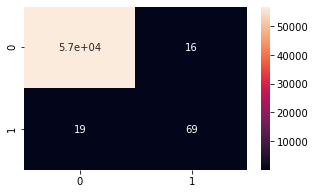

In [36]:
mat_conf=confusion_matrix(y_test,ypred1)
plt.figure(figsize=(5,3))
sns.heatmap(mat_conf,annot=True)
plt.show()

In [1]:
ici le modele a predit pratiquement la major partie des non fraud dans les donnees test et 
environ 78% de fraud dans les donnees test

SyntaxError: invalid syntax (<ipython-input-1-d9ceed583b18>, line 1)

## RESEAU DE NEURONNE

In [37]:
network=models.Sequential()
network.add(layers.Dense(60,activation='relu',input_shape=(30,)))
network.add(layers.Dense(20,activation='relu'))
network.add(layers.Dense(30,activation='relu'))
network.add(layers.Dense(1,activation='sigmoid'))

In [38]:
network.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 60)                1860      
_________________________________________________________________
dense_1 (Dense)              (None, 20)                1220      
_________________________________________________________________
dense_2 (Dense)              (None, 30)                630       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 31        
Total params: 3,741
Trainable params: 3,741
Non-trainable params: 0
_________________________________________________________________


In [39]:
network.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [40]:
network.fit(x_train,y_train,epochs=20,batch_size=10,workers=3)

Epoch 1/20
22785/22785 [==============================] - 64s 3ms/step - loss: 0.0191 - accuracy: 0.9940
Epoch 2/20
22785/22785 [==============================] - 55s 2ms/step - loss: 0.0030 - accuracy: 0.9994
Epoch 3/20
22785/22785 [==============================] - 56s 2ms/step - loss: 0.0032 - accuracy: 0.9994
Epoch 4/20
22785/22785 [==============================] - 55s 2ms/step - loss: 0.0028 - accuracy: 0.9994
Epoch 5/20
22785/22785 [==============================] - 56s 2ms/step - loss: 0.0027 - accuracy: 0.9995
Epoch 6/20
22785/22785 [==============================] - 53s 2ms/step - loss: 0.0026 - accuracy: 0.9995
Epoch 7/20
22785/22785 [==============================] - 55s 2ms/step - loss: 0.0024 - accuracy: 0.9995
Epoch 8/20
22785/22785 [==============================] - 53s 2ms/step - loss: 0.0023 - accuracy: 0.9996
Epoch 9/20
22785/22785 [==============================] - 55s 2ms/step - loss: 0.0021 - accuracy: 0.9995
Epoch 10/20
22785/22785 [==============================

In [41]:
loss,score=network.evaluate(x_test,y_test)
print('score:',score)

1781/1781 [==============================] - 3s 1ms/step - loss: 0.0057 - accuracy: 0.9994
score: 0.9994382262229919


In [ ]:
network.compile(optimizer='adam',loss='binary_crossentropy',metrics=keras.metrics.Recall())

In [ ]:
network.compile(optimizer='adam',loss='binary_crossentropy',metrics=keras.metrics.Precision())

In [42]:
prediction=network.predict(x_test)

In [43]:
prediction_rn=[]
for element in prediction:
    if element>0.5:
        prediction_rn.append(1)
    else:
        prediction_rn.append(0)

In [45]:
network.predict_classes(x_test)

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int32)

In [44]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction_rn))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56874
           1       0.83      0.81      0.82        88

    accuracy                           1.00     56962
   macro avg       0.91      0.90      0.91     56962
weighted avg       1.00      1.00      1.00     56962



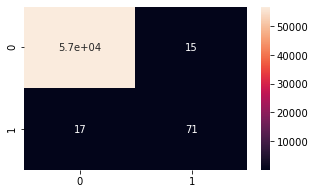

In [46]:
mat_con=confusion_matrix(y_test,prediction_rn)
plt.figure(figsize=(5,3))
sns.heatmap(mat_con,annot=True)
plt.show()

le modele reseau de neuronne a predit la la major partie des non fraud dans les donnees test 
et environ 80% des non fraud dans les donnees test

Dans ces different modeles avec les donnees desequilibrees nous remarquons que nos modeles ont tendance a 
predit plus les cas de non fraud que de cas de fraud.ce qui nous ammene a effectuer un reechantillonnage des donnees.

## Reechantillonnage

C'est une technique largement adoptée pour traiter les ensembles de données très déséquilibrés est appelée rééchantillonnage. Elle consiste à retirer des échantillons de la classe majoritaire (sous-échantillonnage ou Undersampling) et/ou à ajouter des exemples de la classe minoritaire (sur-échantillonnage ou Oversampling à l'anglais).

Dans notre problème nous utiliserons le sur-échantillonnage(Oversampling )

importation de la bibliotheque pour le Oversampling 

In [47]:
from imblearn.over_sampling import RandomOverSampler

In [48]:
my_over = RandomOverSampler(sampling_strategy=0.9)
X_over, y_over = my_over.fit_resample(x_train, y_train)

nous avons augmenter notre classe minoritaire a 90% des donnes majoritaires

In [49]:
data['Class'].value_counts()
y_over.value_counts()

0    227441
1    204696
Name: Class, dtype: int64

## RandonForest avec les donnees reechantillonnees

In [53]:
modelover=RandomForestClassifier()
modelover.fit(X_over, y_over)
ypredover= modelover.predict(x_test)

In [54]:
accuracy_score(y_test,ypredover)

0.9995786664794073

In [55]:
recall_score(y_test,ypredover)

0.7954545454545454

In [56]:
precision_score(y_test,ypredover)

0.9210526315789473

In [57]:
from sklearn.metrics import classification_report
print(classification_report(y_test, ypredover))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56874
           1       0.92      0.80      0.85        88

    accuracy                           1.00     56962
   macro avg       0.96      0.90      0.93     56962
weighted avg       1.00      1.00      1.00     56962



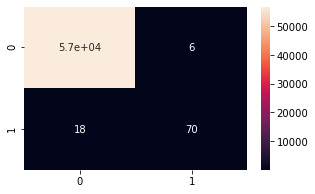

In [58]:
matcon=confusion_matrix(y_test,ypredover)
plt.figure(figsize=(5,3))
sns.heatmap(matcon,annot=True)
plt.show()

## SVM avec les donnees reechantilonnees

In [77]:
modelover1=SVC(kernel='linear')
modelover1.fit(X_over, y_over)
ypredover1=modelover1.predict(x_test)

In [83]:
accuracy_score(y_test,ypredover1)

0.9799691022084899

In [84]:
precision_score(y_test,ypredover1)

0.06523534269199009

In [85]:
recall_score(y_test,ypredover1)

0.8977272727272727

In [81]:
from sklearn.metrics import classification_report
print(classification_report(y_test, ypredover1))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56874
           1       0.07      0.90      0.12        88

    accuracy                           0.98     56962
   macro avg       0.53      0.94      0.56     56962
weighted avg       1.00      0.98      0.99     56962



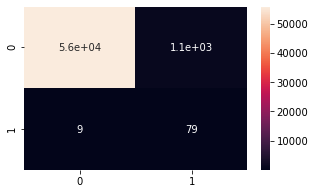

In [82]:
mat_conf=confusion_matrix(y_test,ypredover1)
plt.figure(figsize=(5,3))
sns.heatmap(mat_conf,annot=True)
plt.show()

## Reseau de Neuronne avec les donnees reechantilonnees

In [59]:
network_over=models.Sequential()
network_over.add(layers.Dense(60,activation='relu',input_shape=(30,)))
network_over.add(layers.Dense(20,activation='relu'))
network_over.add(layers.Dense(30,activation='relu'))
network_over.add(layers.Dense(1,activation='sigmoid'))

In [60]:
network_over.summary()
network_over.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
network_over.fit(X_over, y_over,epochs=20,batch_size=10,workers=3)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 60)                1860      
_________________________________________________________________
dense_5 (Dense)              (None, 20)                1220      
_________________________________________________________________
dense_6 (Dense)              (None, 30)                630       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 31        
Total params: 3,741
Trainable params: 3,741
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
43214/43214 [==============================] - 103s 2ms/step - loss: 0.0332 - accuracy: 0.9884
Epoch 2/20
43214/43214 [==============================] - 102s 2ms/step - loss: 0.0059 - accuracy: 0.9986
Epoch 3/20
43214/43214 [==============

In [61]:
loss,score=network_over.evaluate(x_test,y_test)
print('score:',score)

1781/1781 [==============================] - 4s 1ms/step - loss: 0.0230 - accuracy: 0.9993
score: 0.9992977976799011


In [62]:
prediction=network_over.predict(x_test)

In [63]:
prediction_rn_over=[]
for element in prediction:
    if element>0.5:
        prediction_rn_over.append(1)
    else:
        prediction_rn_over.append(0)

In [64]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction_rn_over))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56874
           1       0.74      0.83      0.78        88

    accuracy                           1.00     56962
   macro avg       0.87      0.91      0.89     56962
weighted avg       1.00      1.00      1.00     56962



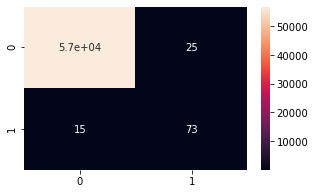

In [65]:
mat_conf=confusion_matrix(y_test,prediction_rn_over)
plt.figure(figsize=(5,3))
sns.heatmap(mat_conf,annot=True)
plt.show()

En guise de conclusion nous retenons que le reechantillonnage donne un meilleur resulat par rapport au donnees non reechantillonnees.c'est a dire que la prediction est precise. 